In [1]:
import pandas as pd
uri = 'https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv'

In [2]:
dados = pd.read_csv(uri)

In [3]:
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [4]:
dados['sold'] = dados['sold'].map({'yes':1, 'no' : 0})

In [5]:
from datetime import datetime
ano_atual = datetime.today().year
dados['idade'] = ano_atual - dados[['model_year']]

In [6]:
dados = dados.drop(columns= ['Unnamed: 0', 'model_year'], axis=1)

In [7]:
dados.head()

,mileage_per_year,price,sold,idade
0,21801,30941.02,1,22
1,7843,40557.96,1,24
2,7109,89627.50,0,16
3,26823,95276.14,0,7
4,7935,117384.68,1,8


In [8]:
dados['km_ano'] = dados['mileage_per_year'] * 1.60934

In [9]:
dados.drop(columns = ['mileage_per_year'], axis=1, inplace=True)

In [10]:
dados.head()

,price,sold,idade,km_ano
0,30941.02,1,22,35085.22134
1,40557.96,1,24,12622.05362
2,89627.50,0,16,11440.79806
3,95276.14,0,7,43167.32682
4,117384.68,1,8,12770.11290


### Model Linear

In [11]:
import numpy as np
x = dados[['price', 'idade', 'km_ano']]
y = dados['sold']


from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Seed = 5
np.random.seed(Seed)

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.25, stratify = y)

model = LinearSVC()
model.fit(train_x, train_y)
predictions = model.predict(test_x)

accuracy = accuracy_score(test_y, predictions) * 100

print(f"Acuracia: {round(accuracy_score(test_y, predictions),2)*100}%")
print(f"Treinado com {len(train_x)} e testado com {len(test_x)}")


Acuracia: 47.0%
Treinado com 7500 e testado com 2500


c:\Users\marcu\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [12]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier()
dummy.fit(train_x, train_y)
previsoes = dummy.predict(test_x)
acuraria = accuracy_score(test_y, previsoes) * 100
print(f"Acuracia do dummy é: {round(accuracy_score(test_y, previsoes),2)*100}%")

Acuracia do dummy é: 57.99999999999999%


In [13]:

dummy_stratified = DummyClassifier()
dummy_stratified.fit(train_x, train_y)
dummy_stratified.score(test_x, test_y)
acuraria = accuracy_score(test_y, previsoes) * 100
print(f"Acuracia do dummy stratified é: {round(accuracy_score(test_y, previsoes),2)*100}%")

Acuracia do dummy stratified é: 57.99999999999999%


In [14]:
import numpy as np

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_train_x, raw_test_x, trein_y, test_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(train_x), len(test_x)))

scaler = StandardScaler()
scaler.fit(raw_train_x)
treino_x = scaler.transform(raw_train_x)
teste_x = scaler.transform(raw_test_x)

modelo = SVC()
modelo.fit(train_x, train_y)
previsoes = modelo.predict(test_x)

acuracia = accuracy_score(test_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 78.24%


### Decison Tree

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_train_x, raw_test_x, trein_y, test_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(train_x), len(test_x)))

scaler = StandardScaler()
scaler.fit(raw_train_x)
treino_x = scaler.transform(raw_train_x)
teste_x = scaler.transform(raw_test_x)

modelo = DecisionTreeClassifier(max_depth=2)
modelo.fit(train_x, train_y)
previsoes = modelo.predict(test_x)

acuracia = accuracy_score(test_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 76.84%


In [17]:
# !pip install graphviz

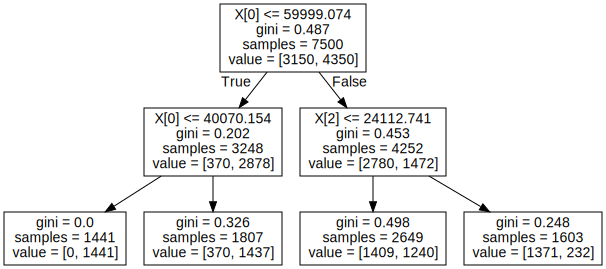

In [21]:
from sklearn.tree import export_graphviz
import graphviz
dot_data = export_graphviz(modelo, out_file=None)
grafico = graphviz.Source(dot_data)
grafico

Personalizando a arvore

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_train_x, raw_test_x, trein_y, test_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(train_x), len(test_x)))



modelo = DecisionTreeClassifier(max_depth=2)
modelo.fit(train_x, train_y)
previsoes = modelo.predict(test_x)

acuracia = accuracy_score(test_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 76.84%


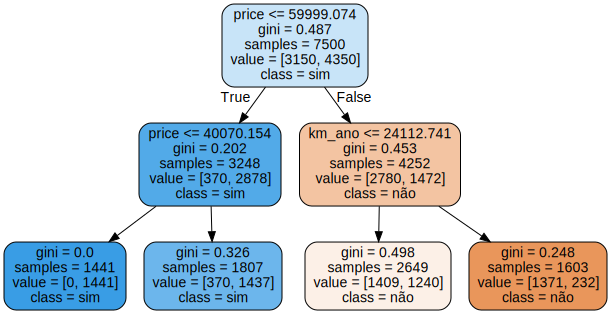

In [24]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(modelo, out_file=None,
filled = True, rounded= True,
feature_names = features,
class_names = ['não', 'sim'])
grafico = graphviz.Source(dot_data)
grafico